# Data Challenge: Football Red Card and Race

Determine whether dark-skinned football players receive penalties at a rate higher than light-skinned players.  

This is a task that was part of a study on analysis methods [1].

[1] Silberzahn, R., E. Uhlmann, D. Martin, P. Anselmi, F. Aust, E. Awtrey, S. Bahník et al. "Many analysts, one dataset: Making transparent how variations in analytical choices affect results https://osf.io/gvm2z." (2016).

https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q#scrollTo=c99EvWo1s9-x

Documentation for dataset: https://osf.io/9yh4x/

## Pavel Brodskiy, Gary Houk, Sophie Chen

## Our Investigation

1. Use EDA to clean data and manage correlated variables (weight / height)
2. Find a rate of red card aggregated by each player.
3. Model the rate using regression
4. Try a Mixed Effect model to attempt to account for referee-specific bias


### Hypotheses
-  Skin tone does affect the rate of red cards

## Findings
- **Result #1 for Regression:** Linear regression on data grouped by player indicates no significant (p= 0.204) effect of skin color on rate on the rate of red cards per game
- **Result #2 for Mixed Effect Model**  Inconclusive.

## Recommendation for football as a sport
- Don't aggregate your data before handing it to a data scientist - I swear we can handle that part if we need to.


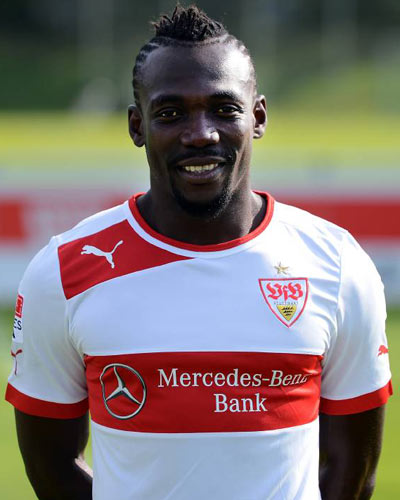

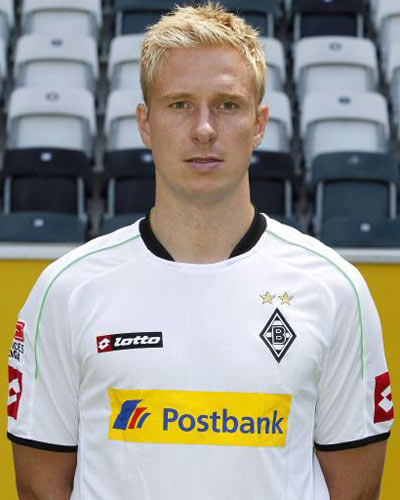

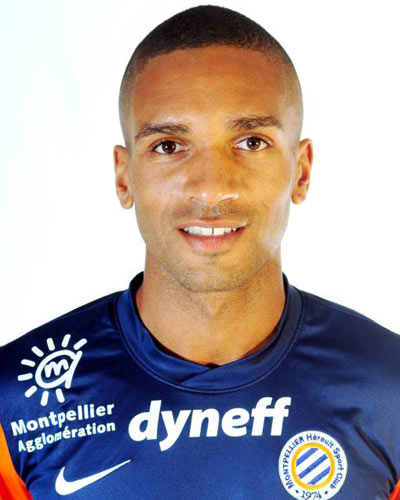

In [84]:
from IPython.display import Image, display
display(Image('Pics/static.weltsport.net-22642.jpg'))
display(Image('Pics/static.weltsport.net-2119.jpg'))
display(Image('Pics/static.weltsport.net-52333.jpg'))


In [0]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import numpy as np
import random as rnd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

from scipy import sparse
import io
from google.colab import files


mpl.rcParams['figure.dpi'] = 150

# Import data

In [0]:
dtype = {
    'playerShort'   : 'category',
    'player'        : 'category',
    'club'          : 'category',
    'leagueCountry' : 'category',
    'birthday'      : 'str',
    'height'        : 'float',
    'weight'        : 'float',
    'position'      : 'category',
    'games'         : 'int',
    'victories'     : 'int',
    'ties'          : 'int',
    'defeats'       : 'int',
    'goals'         : 'int',
    'yellowCards'   : 'int',
    'yellowReds'    : 'int',
    'redCards'      : 'int',
    'photoID'       : 'str',
    'rater1'        : 'float',
    'rater2'        : 'float',
    'refNum'        : 'category',
    'refCountry'    : 'category',
    'Alpha_3'       : 'category',
    'meanIAT'       : 'float',
    'nIAT'          : 'float',
    'seIAT'         : 'float',
    'meanExp'       : 'float',
    'nExp'          : 'float',
    'seExp'         : 'float'
}

In [49]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [0]:

pd.set_option('display.max_columns', None)
raw_data = pd.read_csv('redcard.csv', dtype=dtype, parse_dates=['birthday'])


In [52]:
raw_data

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,1983-08-31,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,1982-08-01,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,1992-12-17,181.0,79.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,1993-08-31,191.0,87.0,Center Back,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,1991-07-18,172.0,70.0,Right Midfielder,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-08-11,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-10-11,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,1986-04-04,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,1984-04-13,193.0,80.0,Goalkeeper,1,0,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,1987-03-13,180.0,70.0,Right Fullback,1,1,0,0,0,0,0,0,36499.jpg,0.00,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [53]:
[len(raw_data[['playerShort','refNum']]), len(raw_data[['playerShort','refNum']].drop_duplicates())]

[146028, 146028]

In [54]:
data = pd.DataFrame({
    'red_cards_per_game' : (raw_data['yellowReds']+raw_data['redCards'])/raw_data['games'],
    'skin_color'         : (raw_data['rater1'] + raw_data['rater2']) / 2,
    'height'             : raw_data['height'],
    'weight'             : raw_data['weight'],
    'age'                : (pd.to_datetime('2013') - raw_data['birthday']) / pd.Timedelta(days=365.25),
    'position'           : raw_data['position'],
    'meanIAT'            : raw_data['meanIAT'],
    'meanExp'            : raw_data['meanExp'],
    'club'               : raw_data['club'],
    'refNum'             : raw_data['refNum'],
    'games'              : raw_data['games'],
})

data.dropna(inplace=True)

data

,age,club,games,height,meanExp,meanIAT,position,red_cards_per_game,refNum,skin_color,weight
0,29.338809,Real Zaragoza,1,177.0,0.396000,0.326391,Attacking Midfielder,0.0,1,0.375,72.0
1,30.420260,Montpellier HSC,1,179.0,-0.204082,0.203375,Right Winger,0.0,2,0.750,82.0
5,33.393566,Fulham FC,1,182.0,0.538462,0.325185,Center Back,0.0,4,0.125,71.0
6,27.225188,Manchester City,1,187.0,0.538462,0.325185,Left Fullback,0.0,4,0.125,80.0
7,26.746064,Norwich City,1,180.0,0.538462,0.325185,Defensive Midfielder,0.0,4,1.000,68.0
8,28.720055,Manchester United,1,193.0,0.538462,0.325185,Goalkeeper,0.0,4,0.250,80.0
9,25.806982,1899 Hoffenheim,1,180.0,0.538462,0.325185,Right Fullback,0.0,4,0.000,70.0
10,28.933607,Real Valladolid,2,177.0,0.538462,0.325185,Right Fullback,0.0,4,0.000,74.0
11,26.655715,Fulham FC,1,181.0,0.538462,0.325185,Left Winger,0.0,4,0.500,74.0
12,24.840520,FC Schalke 04,1,187.0,0.538462,0.325185,Center Back,0.0,4,0.000,80.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Skin color')

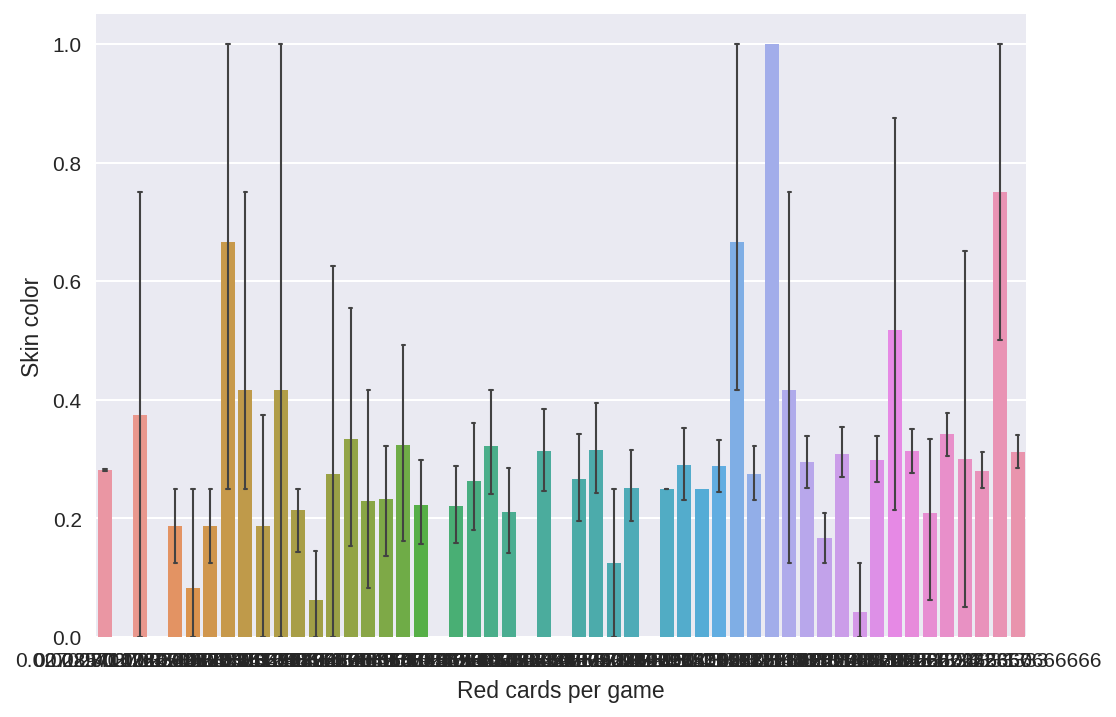

In [55]:
tmp_df = data.copy(deep=True)
#idx = np.logical_and(tmp_df['red_cards_per_game'].values!=0,tmp_df['red_cards_per_game'].values!=1)
#tmp_df.loc[idx,'red_cards_per_game'] = 0.5

sns.barplot(data=tmp_df, x='red_cards_per_game', y='skin_color', errwidth=1, capsize=0.2, n_boot=1000, ci=95)

plt.xlabel('Red cards per game')
plt.ylabel('Skin color')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Red cards per game')

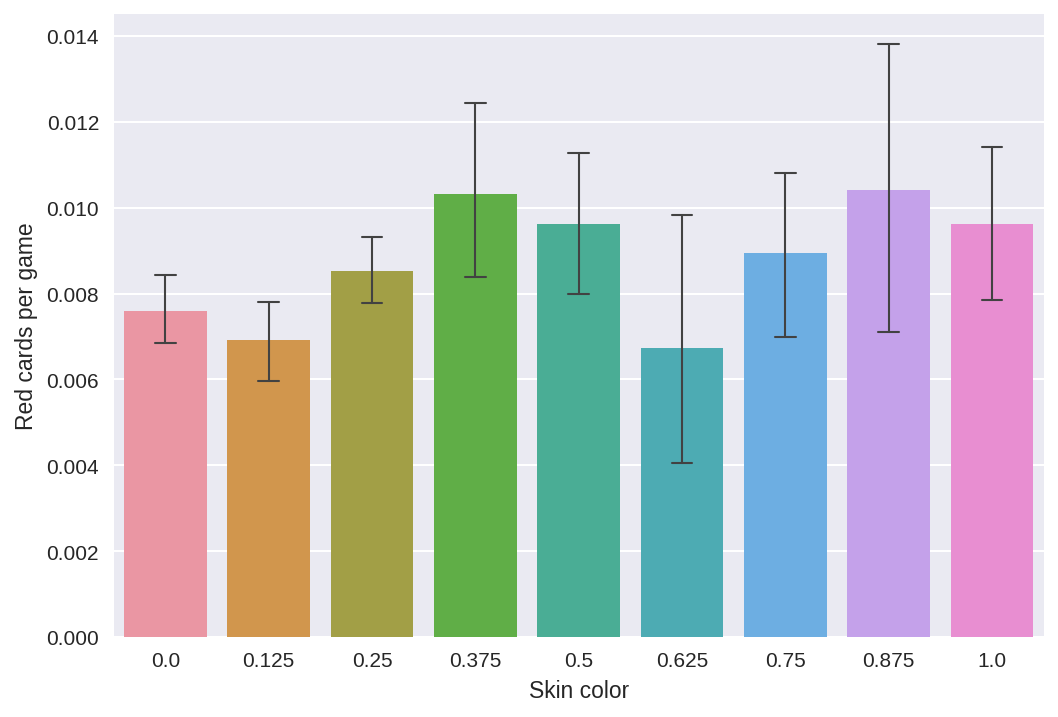

In [56]:
sns.barplot(data=tmp_df, x='skin_color', y='red_cards_per_game', errwidth=1, capsize=0.2, n_boot=1000, ci=95)

plt.xlabel('Skin color')
plt.ylabel('Red cards per game')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

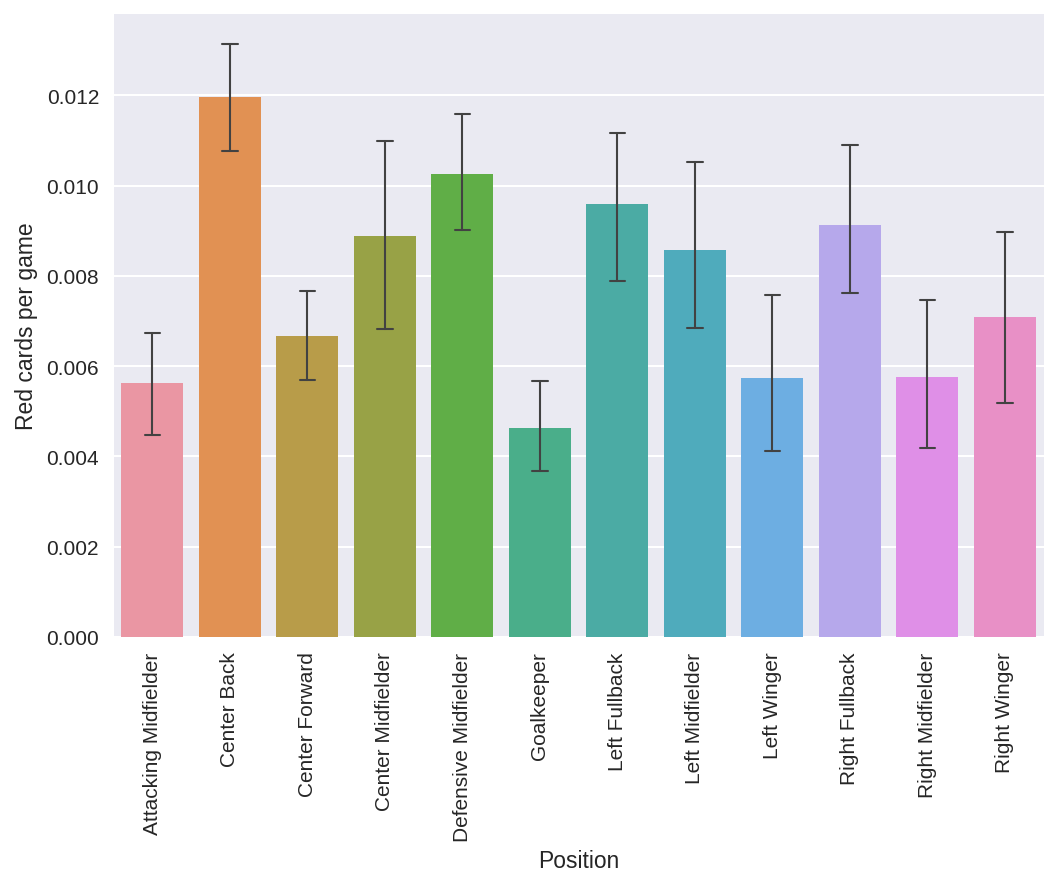

In [57]:
sns.barplot(data=tmp_df, x='position', y='red_cards_per_game', errwidth=1, capsize=0.2, n_boot=1000, ci=95)

plt.xlabel('Position')
plt.ylabel('Red cards per game')
plt.xticks(rotation='vertical')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62869aff60>,
      dtype=object)

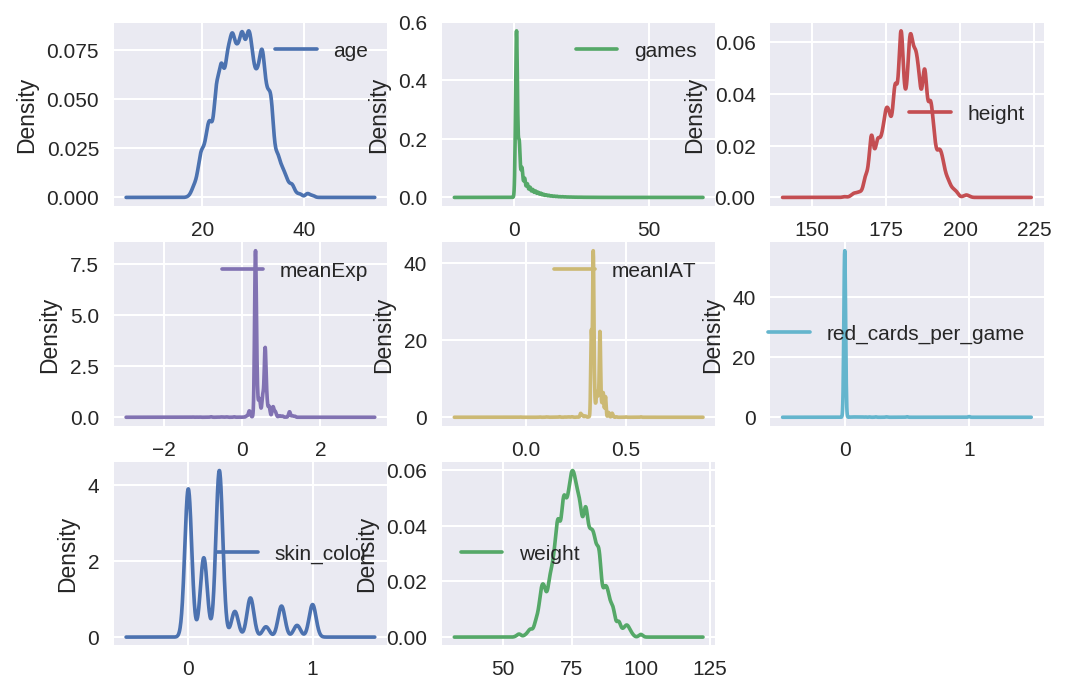

In [58]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex = False)

In [59]:
raw_data[raw_data['playerShort']=='aleksandar-kolarov'].head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-10-11,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0.0,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
344,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-10-11,187.0,80.0,Left Fullback,1,0,0,1,0,0,0,0,47704.jpg,0.0,0.25,20,17,OMN,0.343632,72.0,0.007075,0.368421,76.0,0.026651
2322,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-10-11,187.0,80.0,Left Fullback,2,1,1,0,0,1,0,0,47704.jpg,0.0,0.25,88,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4015,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-10-11,187.0,80.0,Left Fullback,1,1,0,0,0,1,0,0,47704.jpg,0.0,0.25,113,52,RUS,0.398174,526.0,0.000809,1.212727,550.0,0.004521
5039,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-10-11,187.0,80.0,Left Fullback,2,0,1,1,0,0,0,0,47704.jpg,0.0,0.25,131,27,ROU,0.385082,537.0,0.000756,0.859431,562.0,0.003620


In [63]:
df_raw_agg = raw_data.groupby(['playerShort']).agg(['sum','mean'])
df_raw_agg = df_raw_agg.reset_index()
df_raw_agg.head()

playerShort   height          weight       games            \
                               sum   mean      sum  mean   sum      mean   
0            aaron-hughes  30212.0  182.0  11786.0  71.0   654  3.939759   
1              aaron-hunt  18117.0  183.0   7227.0  73.0   336  3.393939   
2            aaron-lennon  16665.0  165.0   6363.0  63.0   412  4.079208   
3            aaron-ramsey  18512.0  178.0   7904.0  76.0   260  2.500000   
4  abdelhamid-el-kaoutari   6660.0  180.0   2701.0  73.0   124  3.351351   

  victories           ties           defeats           goals            \
        sum      mean  sum      mean     sum      mean   sum      mean   
0       247  1.487952  179  1.078313     228  1.373494     9  0.054217   
1       141  1.424242   73  0.737374     122  1.232323    62  0.626263   
2       200  1.980198   97  0.960396     115  1.138614    31  0.306931   
3       150  1.442308   42  0.403846      68  0.653846    39  0.375000   
4        41  1.108108   40  1.081081      43  1.162162     1  0.027027   

  yellowCards           yellowReds           redCards           rater1        \
          sum      mean        sum      mean      sum      mean    sum  mean   
0          19  0.114458          0  0.000000        0  0.000000  41.50  0.25   
1          42  0.424242          0  0.000000        1  0.010101   0.00  0.00   
2          11  0.108911          0  0.000000        0  0.000000  25.25  0.25   
3          31  0.298077          0  0.000000        1  0.009615   0.00  0.00   
4           8  0.216216          4  0.108108        2  0.054054   9.25  0.25   

  rater2          meanIAT                 nIAT                   seIAT  \
     sum  mean        sum      mean        sum          mean       sum   
0   0.00  0.00  57.512216  0.346459  3271886.0  19710.156627  0.108188   
1  24.75  0.25  34.533016  0.348818  2584325.0  26104.292929  0.021653   
2  25.25  0.25  34.935186  0.345893  2144721.0  21234.861386  0.037077   
3   0.00  0.00  36.069415  0.346821  3981726.0  38285.826923  0.346742   
4   9.25  0.25  12.269183  0.331600   104797.0   2832.351351  0.055051   

               meanExp                 nExp                   seExp            
       mean        sum      mean        sum          mean       sum      mean  
0  0.000652  82.099423  0.494575  3425788.0  20637.277108  0.674798  0.004065  
1  0.000219  44.472801  0.449220  2659581.0  26864.454545  0.098278  0.000993  
2  0.000367  49.639661  0.491482  2246113.0  22238.742574  0.205244  0.002032  
3  0.003334  53.528110  0.514693  4130878.0  39719.980769  1.406334  0.013522  
4  0.001488  12.416728  0.335587   109292.0   2953.837838  0.195960  0.005296

In [65]:
df_raw_agg = raw_data.groupby(['playerShort','height','weight','birthday','position','club','rater1','rater2']).agg(['sum','mean'])
df_raw_agg = df_raw_agg.reset_index()
df_raw_agg.head()

df_agg = pd.DataFrame({
    'red_cards_per_game' : (df_raw_agg['redCards']['sum']+df_raw_agg['yellowCards']['sum']) / df_raw_agg['games']['sum'],
    'skin_color'         : (df_raw_agg['rater1'] + df_raw_agg['rater2']) / 2,
    'height'             : df_raw_agg['height'],
    'weight'             : df_raw_agg['weight'],
    'age'                : (pd.to_datetime('2013') - df_raw_agg['birthday']) / pd.Timedelta(days=365.25),
    'position'           : df_raw_agg['position'],
    'club'               : df_raw_agg['club'],
    'goals_per_game'     : df_raw_agg['goals']['sum'] / df_raw_agg['games']['sum'],
    'victory_rate'       : (df_raw_agg['victories']['sum'] + 0.5*df_raw_agg['ties']['sum']) / df_raw_agg['games']['sum'],
    'meanIAT'            : df_raw_agg['meanIAT']['mean'],
    'meanExp'            : df_raw_agg['meanExp']['mean'],
    'games'              : df_raw_agg['games']['sum'],
    'playerShort'        : df_raw_agg['playerShort'],
})

df_agg.head()

,age,club,games,goals_per_game,height,meanExp,meanIAT,playerShort,position,red_cards_per_game,skin_color,victory_rate,weight
0,33.393566,Fulham FC,654,0.013761,182.0,0.494575,0.346459,aaron-hughes,Center Back,0.029052,0.125,0.514526,71.0
1,26.732375,Werder Bremen,336,0.184524,183.0,0.449220,0.348818,aaron-hunt,Attacking Midfielder,0.127976,0.125,0.528274,73.0
2,25.713895,Tottenham Hotspur,412,0.075243,165.0,0.491482,0.345893,aaron-lennon,Right Midfielder,0.026699,0.250,0.603155,63.0
3,22.017796,Arsenal FC,260,0.150000,178.0,0.514693,0.346821,aaron-ramsey,Center Midfielder,0.123077,0.000,0.657692,76.0
4,22.795346,Montpellier HSC,124,0.008065,180.0,0.335587,0.331600,abdelhamid-el-kaoutari,Center Back,0.080645,0.250,0.491935,73.0


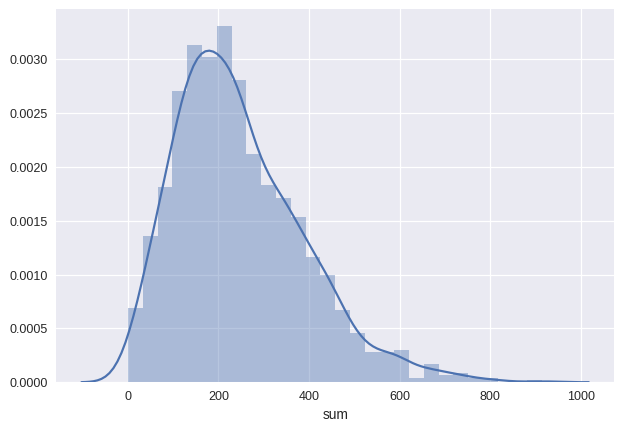

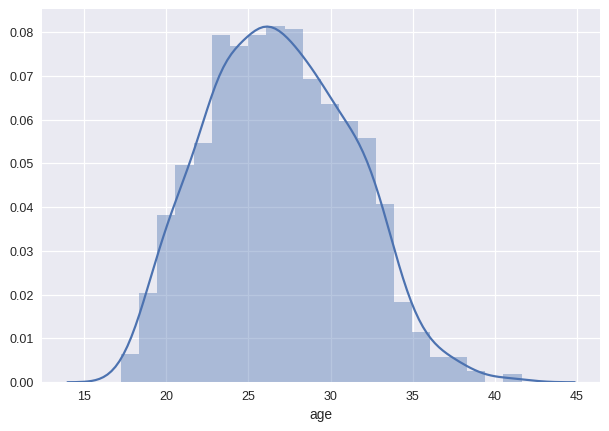

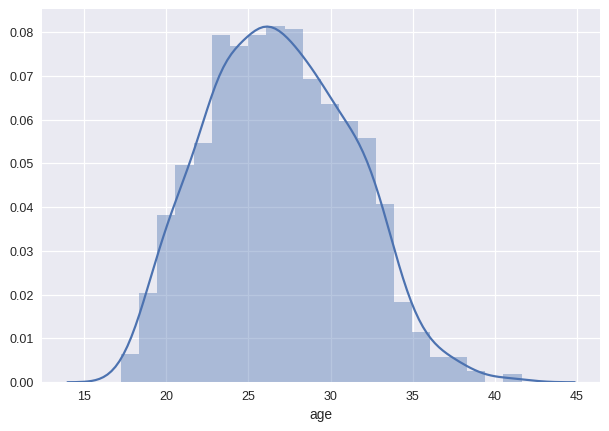

In [66]:
mpl.rcParams['figure.dpi'] = 90
sns.distplot(df_raw_agg['games']['sum'])
plt.show()

sns.distplot(df_agg['age'])
plt.show()
sns.distplot(df_agg['age'])
plt.show()

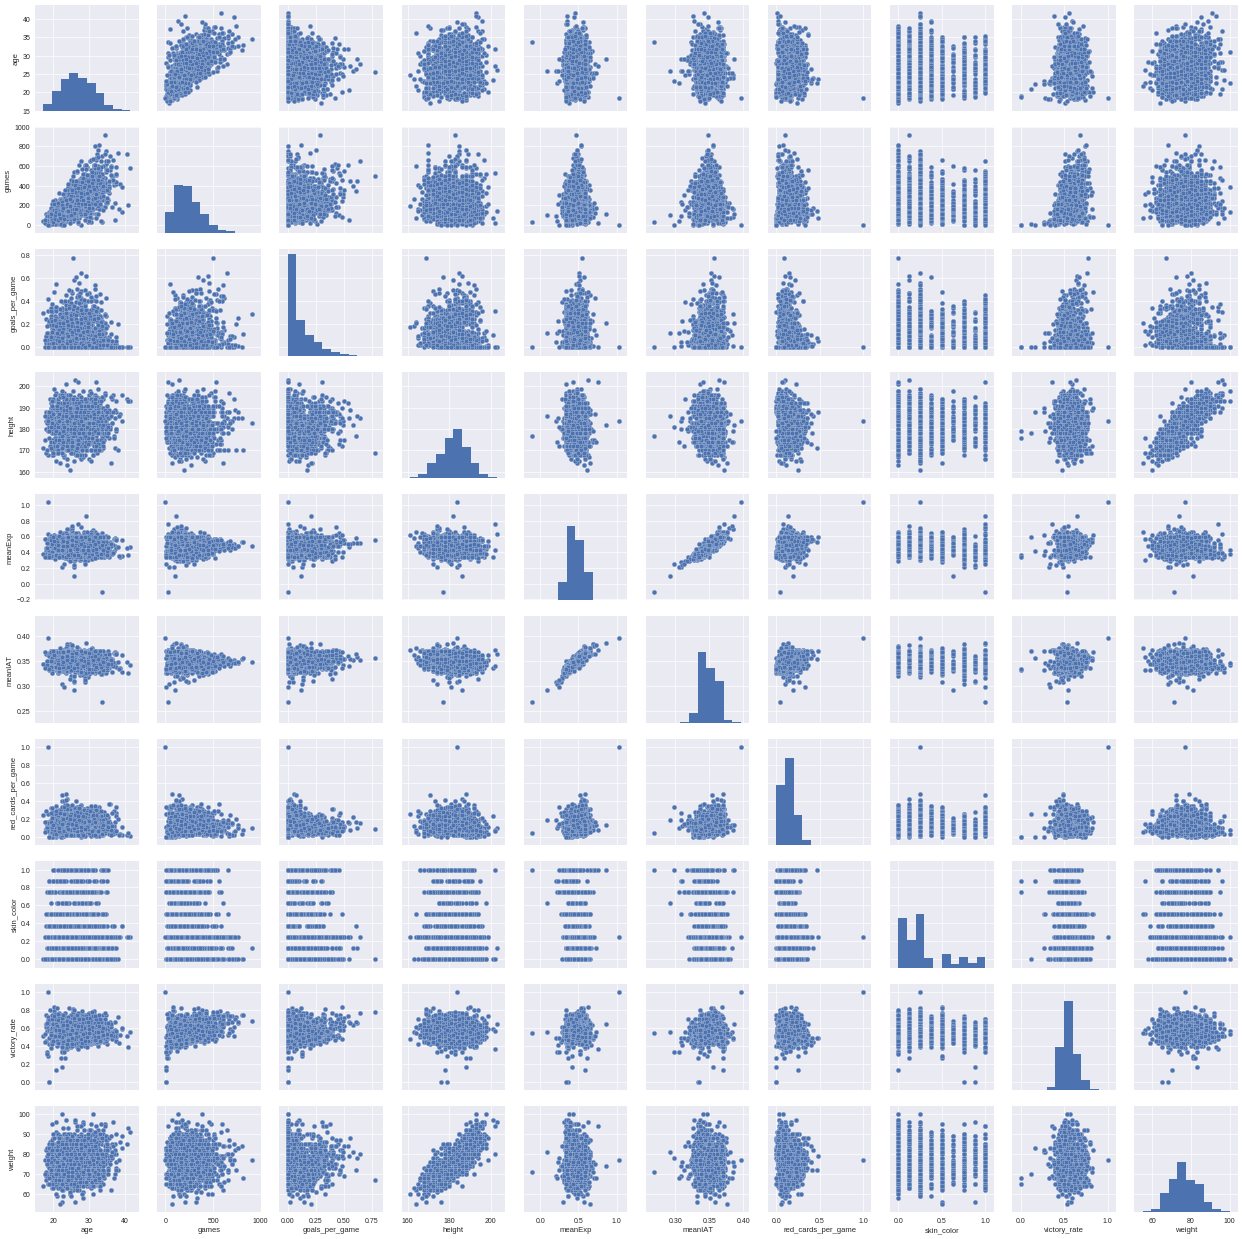

In [67]:
mpl.rcParams['figure.dpi'] = 50
sns.pairplot(df_agg)

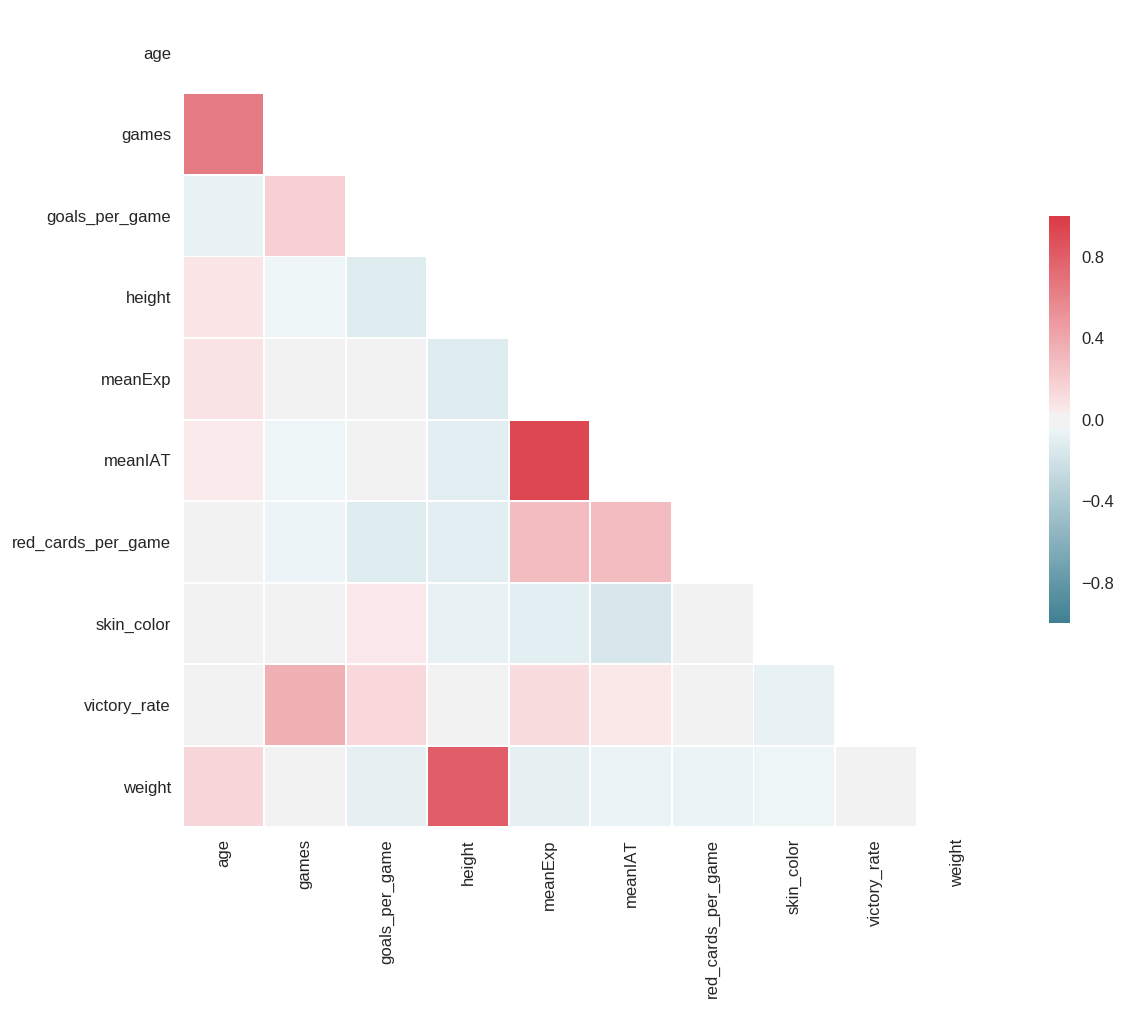

In [68]:
mpl.rcParams['figure.dpi'] = 120
sns.set(style="white")
corr = df_agg.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [69]:
df_agg = df_agg[df_agg['games'] > 5]
df_agg

,age,club,games,goals_per_game,height,meanExp,meanIAT,playerShort,position,red_cards_per_game,skin_color,victory_rate,weight
0,33.393566,Fulham FC,654,0.013761,182.0,0.494575,0.346459,aaron-hughes,Center Back,0.029052,0.125,0.514526,71.0
1,26.732375,Werder Bremen,336,0.184524,183.0,0.449220,0.348818,aaron-hunt,Attacking Midfielder,0.127976,0.125,0.528274,73.0
2,25.713895,Tottenham Hotspur,412,0.075243,165.0,0.491482,0.345893,aaron-lennon,Right Midfielder,0.026699,0.250,0.603155,63.0
3,22.017796,Arsenal FC,260,0.150000,178.0,0.514693,0.346821,aaron-ramsey,Center Midfielder,0.123077,0.000,0.657692,76.0
4,22.795346,Montpellier HSC,124,0.008065,180.0,0.335587,0.331600,abdelhamid-el-kaoutari,Center Back,0.080645,0.250,0.491935,73.0
5,24.958248,Girondins Bordeaux,97,0.030928,180.0,0.296562,0.320079,abdou-traore_2,Right Midfielder,0.113402,0.750,0.541237,74.0
6,20.758385,Stade Rennes,24,0.000000,189.0,0.400818,0.341625,abdoulaye-diallo_2,Goalkeeper,0.000000,0.875,0.500000,80.0
8,22.787132,Stade Brest,121,0.024793,180.0,0.429630,0.348178,abdoulwhaid-sissoko,Defensive Midfielder,0.190083,1.000,0.384298,68.0
9,18.899384,SpVgg Greuther Fürth,50,0.000000,179.0,0.361068,0.342072,abdul-rahman-baba,Left Fullback,0.080000,0.875,0.420000,70.0
10,20.139630,Manchester City,36,0.000000,180.0,0.536408,0.354566,abdul-razak,Center Midfielder,0.055556,1.000,0.555556,78.0


In [70]:
data_encoded = df_agg.copy(deep=True)
data_encoded = data_encoded.loc[:, data_encoded.columns != 'club']

data_encoded = pd.get_dummies(data_encoded, drop_first=True)
data_encoded.head(5)

age  games  goals_per_game  height   meanExp   meanIAT  \
0  33.393566    654        0.013761   182.0  0.494575  0.346459   
1  26.732375    336        0.184524   183.0  0.449220  0.348818   
2  25.713895    412        0.075243   165.0  0.491482  0.345893   
3  22.017796    260        0.150000   178.0  0.514693  0.346821   
4  22.795346    124        0.008065   180.0  0.335587  0.331600   

   red_cards_per_game  skin_color  victory_rate  weight  \
0            0.029052       0.125      0.514526    71.0   
1            0.127976       0.125      0.528274    73.0   
2            0.026699       0.250      0.603155    63.0   
3            0.123077       0.000      0.657692    76.0   
4            0.080645       0.250      0.491935    73.0   

   playerShort_aaron-hunt  playerShort_aaron-lennon  playerShort_aaron-ramsey  \
0                       0                         0                         0   
1                       1                         0                         0   
2                       0                         1                         0   
3                       0                         0                         1   
4                       0                         0                         0   

   playerShort_abdelhamid-el-kaoutari  playerShort_abdon-prats  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   1                        0   

   playerShort_abdou-dampha  playerShort_abdou-traore_2  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   playerShort_abdoul-camara  playerShort_abdoulaye-diallo_2  \
0                          0                               0   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                               0   

   playerShort_abdoulaye-diallo_3  playerShort_abdoulaye-keita_2  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   playerShort_abdoulaye-sane  playerShort_abdoulwhaid-sissoko  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   playerShort_abdul-rahman-baba  playerShort_abdul-razak  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   playerShort_abel-aguilar  playerShort_abel-khaled  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   playerShort_abelaziz-barrada  playerShort_abou-diaby  \
0                             0                       0   

## Result #1 for Regression Model


In [71]:
import statsmodels.api as sm

data_encoded = df_agg.copy(deep=True)
data_encoded = data_encoded.loc[:, data_encoded.columns != 'club']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'playerShort']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'weight']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'games']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'meanIAT']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'meanExp']
data_encoded = pd.get_dummies(data_encoded)

target = 'red_cards_per_game'

y = data_encoded[target].values
predictors = data_encoded.loc[:, data_encoded.columns != target].columns.values
X = data_encoded.loc[:, predictors].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

mod = sm.OLS(y, sm.add_constant(X))

res = mod.fit()

predictors_with_constant = predictors.tolist()
predictors_with_constant.insert(0, 'constant')

print(res.summary(yname=target, xname=predictors_with_constant))

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:     red_cards_per_game   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     39.49
Date:                Thu, 01 Nov 2018   Prob (F-statistic):          3.21e-101
Time:                        22:48:34   Log-Likelihood:                 1917.6
No. Observations:                1413   AIC:                            -3801.
Df Residuals:                    1396   BIC:                            -3712.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
constant      

In [72]:
import statsmodels.api as sm

data_encoded = df_agg.copy(deep=True)
data_encoded = data_encoded.loc[:, data_encoded.columns != 'club']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'playerShort']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'weight']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'games']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'meanIAT']
#data_encoded = data_encoded.loc[:, data_encoded.columns != 'meanExp']
data_encoded = pd.get_dummies(data_encoded)

target = 'red_cards_per_game'

y = data_encoded[target].values
predictors = data_encoded.loc[:, data_encoded.columns != target].columns.values
X = data_encoded.loc[:, predictors].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

mod = sm.OLS(y, sm.add_constant(X))

res = mod.fit()

predictors_with_constant = predictors.tolist()
predictors_with_constant.insert(0, 'constant')

print(res.summary(yname=target, xname=predictors_with_constant))

                            OLS Regression Results                            
Dep. Variable:     red_cards_per_game   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     49.01
Date:                Thu, 01 Nov 2018   Prob (F-statistic):          1.38e-128
Time:                        22:48:35   Log-Likelihood:                 1984.7
No. Observations:                1413   AIC:                            -3933.
Df Residuals:                    1395   BIC:                            -3839.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
constant      

In [73]:
import statsmodels.api as sm

data_encoded = df_agg.copy(deep=True)
data_encoded['IAT_times_skin_color'] = data_encoded['meanIAT'] * data_encoded['skin_color']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'club']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'playerShort']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'weight']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'games']
#data_encoded = data_encoded.loc[:, data_encoded.columns != 'meanIAT']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'meanExp']
data_encoded = pd.get_dummies(data_encoded)

target = 'red_cards_per_game'

y = data_encoded[target].values
predictors = data_encoded.loc[:, data_encoded.columns != target].columns.values
X = data_encoded.loc[:, predictors].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

mod = sm.OLS(y, sm.add_constant(X))

res = mod.fit()

predictors_with_constant = predictors.tolist()
predictors_with_constant.insert(0, 'constant')

print(res.summary(yname=target, xname=predictors_with_constant))

                            OLS Regression Results                            
Dep. Variable:     red_cards_per_game   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     49.06
Date:                Thu, 01 Nov 2018   Prob (F-statistic):          2.21e-134
Time:                        22:48:37   Log-Likelihood:                 2000.5
No. Observations:                1413   AIC:                            -3963.
Df Residuals:                    1394   BIC:                            -3863.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
constant      

                            OLS Regression Results                            
Dep. Variable:     red_cards_per_game   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     42.00
Date:                Thu, 01 Nov 2018   Prob (F-statistic):          1.07e-101
Time:                        22:48:38   Log-Likelihood:                 1916.7
No. Observations:                1413   AIC:                            -3801.
Df Residuals:                    1397   BIC:                            -3717.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
constant      

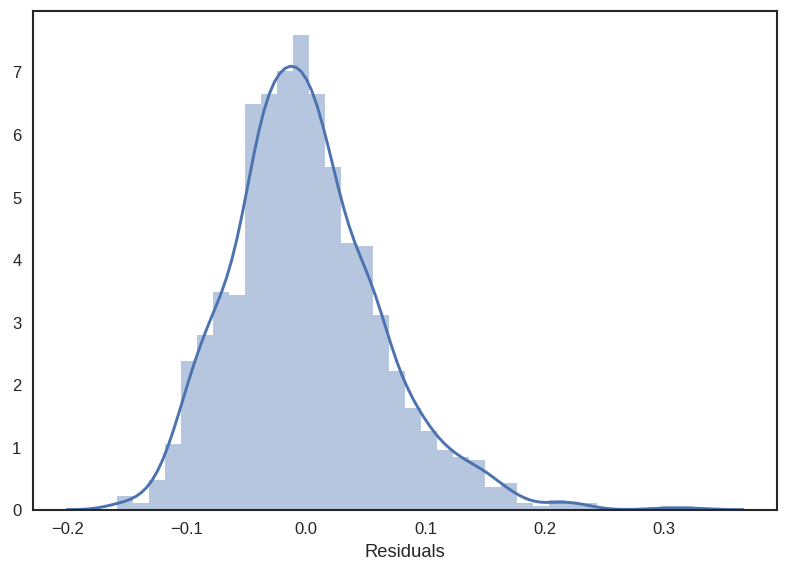

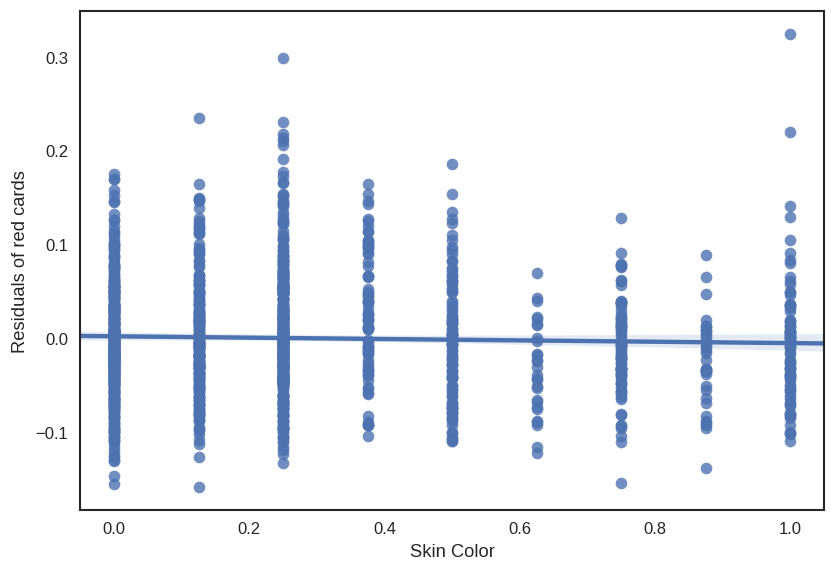

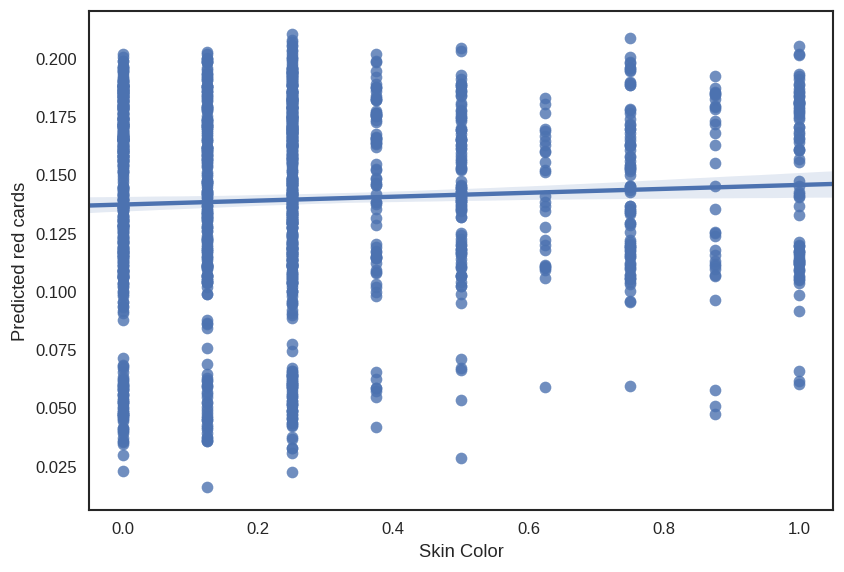

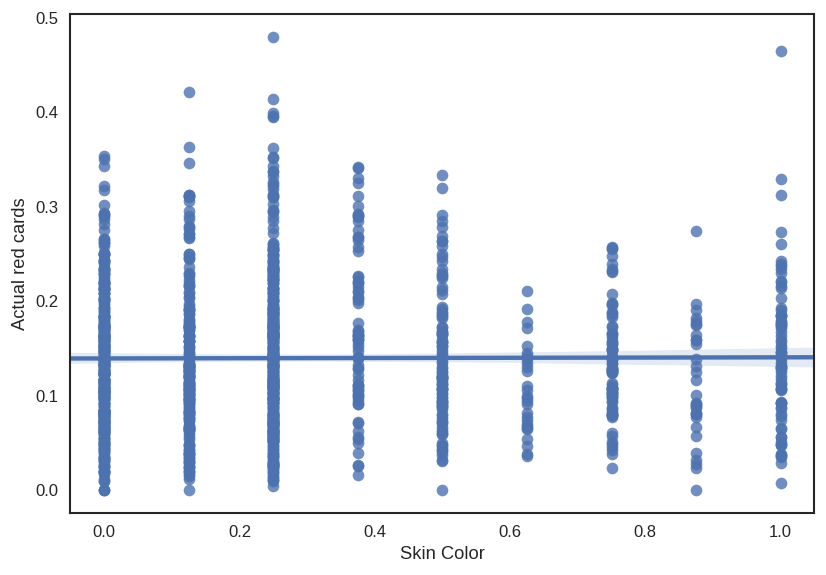

In [74]:
import statsmodels.api as sm
import seaborn as sns

data_encoded = df_agg.copy(deep=True)
data_encoded = data_encoded.loc[:, data_encoded.columns != 'club']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'playerShort']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'weight']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'games']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'meanIAT']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'meanExp']
skin_color = data_encoded['skin_color']
data_encoded = data_encoded.loc[:, data_encoded.columns != 'skin_color']
data_encoded = pd.get_dummies(data_encoded)

target = 'red_cards_per_game'

y = data_encoded[target].values
predictors = data_encoded.loc[:, data_encoded.columns != target].columns.values
X = data_encoded.loc[:, predictors].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

mod = sm.OLS(y, sm.add_constant(X))

res = mod.fit()

predictors_with_constant = predictors.tolist()
predictors_with_constant.insert(0, 'constant')

print(res.summary(yname=target, xname=predictors_with_constant))

sns.distplot(res.resid)
plt.xlabel('Residuals')
plt.show()

sns.regplot(x=skin_color, y=res.resid)
plt.xlabel('Skin Color')
plt.ylabel('Residuals of red cards')
plt.show()

sns.regplot(x=skin_color, y=res.fittedvalues)
plt.xlabel('Skin Color')
plt.ylabel('Predicted red cards')
plt.show()

sns.regplot(x=skin_color, y=y)
plt.xlabel('Skin Color')
plt.ylabel('Actual red cards')
plt.show()


In [75]:
import statsmodels.formula.api as smf

md = smf.mixedlm("red_cards_per_game ~ skin_color", data, groups=data["refNum"])

res = md.fit()

print(res.summary())



/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: red_cards_per_game
No. Observations: 115457  Method:             REML              
No. Groups:       2893    Scale:              0.0052            
Min. group size:  1       Likelihood:         139347.2105       
Max. group size:  772     Converged:          Yes               
Mean group size:  39.9                                          
------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept      0.008      0.000   22.438   0.000    0.007    0.008
skin_color     0.003      0.001    3.411   0.001    0.001    0.004
groups RE      0.000      0.000                                   



In [76]:
np.max(data['red_cards_per_game'])

1.0

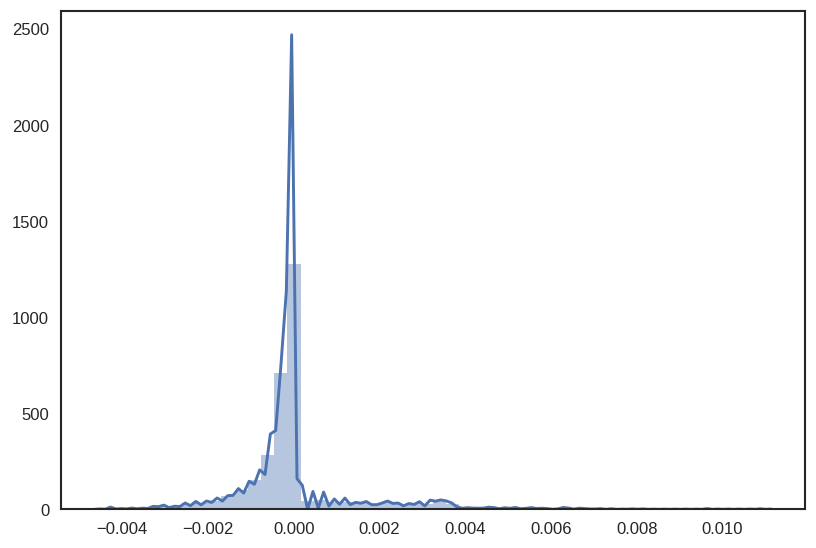

In [77]:
sns.distplot(list(res.random_effects.values()))

In [78]:
import statsmodels.formula.api as smf

md = smf.mixedlm("red_cards_per_game ~ skin_color", data, groups=data["refNum"], re_formula="~skin_color")

res = md.fit()

print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


KeyboardInterrupt: ignored

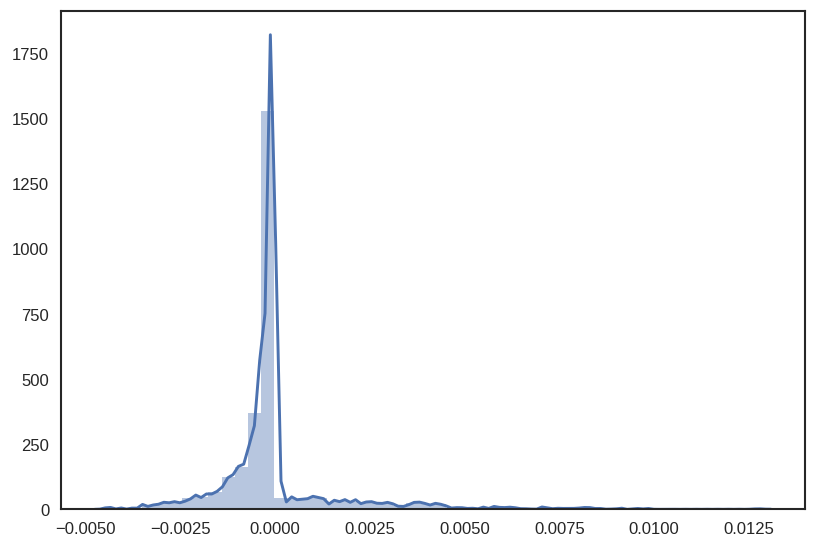

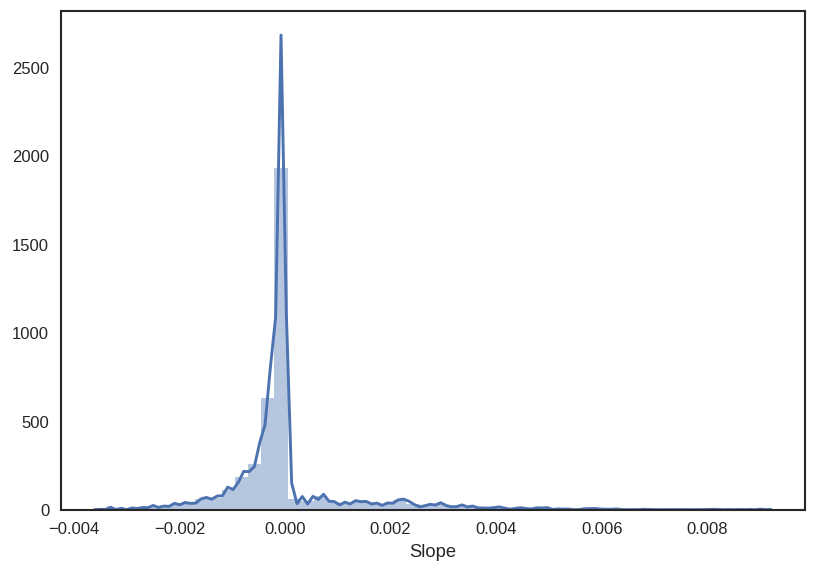

Text(0.5,0,'Intercept')

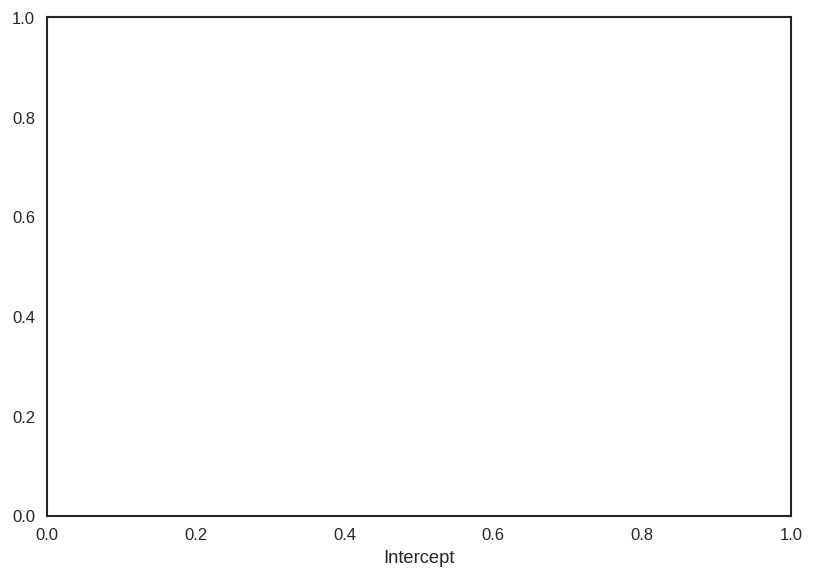

In [367]:
df = pd.DataFrame(res.random_effects)
sns.distplot(df.loc['skin_color',:].values)
plt.xlabel('Slope')
plt.show()

df = pd.DataFrame(res.random_effects)
sns.distplot(df.loc['Intercept',:].values)
plt.xlabel('Intercept')
plt.show()

array([-4.26405524e-05, -2.63314642e-03, -1.95744511e-04, ...,
       -5.28257872e-04, -1.11930317e-04, -7.02175462e-05])